In [1]:
import numpy as np
np.random.seed(10)

s0 = 100 #초기값. 초기 주가값.
mu = 0.1 #10%. expected return.
sigma = 0.3 #30%. 작으면 변동이 덜하고 크면 변동이 크다.
T = 2 #몇 년동안 simulation 할 것인가. 만기 시기.
n = 12*21 #1년은 12달, 1달은 21일의 business day로 이루어져 있다.
dt = 1/n
n_sample_paths = 2

In [2]:
pm_one = 2*np.random.binomial(1, 0.5, size=(n*T, n_sample_paths)) -1 #50% 확률로 +-1이 나오도록 지정
db = pm_one * np.sqrt(dt)

lhs = mu*dt + sigma*db
time = np.arange(n*T +1) * dt
stock = np.empty( (n*T+1, n_sample_paths)) #stock_price?
stock[0] = s0
for t in range(n*T) :
    stock[t+1] = stock[t] + stock[t]*lhs[t]

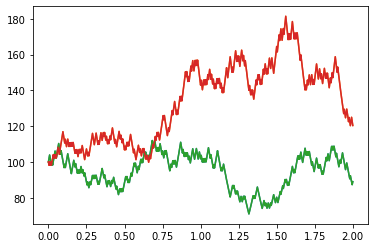

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(n_sample_paths) :
    plt.plot(time, stock[:, i])

plt.plot(time, stock)
plt.show()